In [1]:
import itertools
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from collections import Counter, defaultdict
from gensim.corpora.dictionary import Dictionary

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 1. Introduction to spaCy
### 1.1. Theory
In this section, we'll take a look at the most important concepts of spaCy and how to get started.
#### The nlp object
At the center of `spaCy` is the object containing the processing pipeline. We usually call this `variable: "nlp"`. 

For example, to create an `English nlp` object, you can import the `English language` class from `spacy.lang.en` and instantiate it. 

In [2]:
# Import the English language class
from spacy.lang.en import English

# create the NLP-object
nlp = English()

You can use the nlp object like a function to analyze text. 

- It contains all the different components in the `pipeline`. 
- It also includes `language-specific` rules used for tokenizing the text into `words` and `punctuation`. 

`spaCy` supports a variety of languages that are available in `spacy.lang`.

#### The Doc object
When you process a text with the nlp object, spaCy creates a `Doc object` – short for `"document"`.

The `Doc` lets you access information about the text in a structured way, and no information is lost. 

The Doc behaves like a normal `Python` sequence by the way and lets you iterate over its tokens, or get a token by its index. But more on that later!

In [3]:
# Created by processing a string of text with the NLP object
doc = nlp("Hello world!")

# Iterate over token in doc
for token in doc:
    print(token.text)

Hello
world
!


#### The Token object
`Token` objects represent the tokens in a document – for example, a word or a punctuation character. To get a token at a `specific position`, you can index into the `Doc`. 

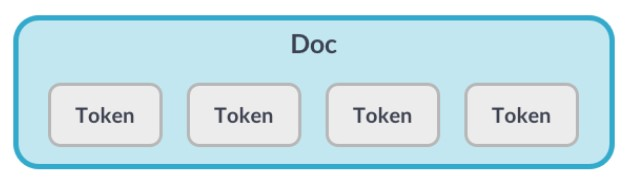

In [4]:
from IPython.display import Image
## Hình minh họa Image(fig1, height, width)

`Token` objects also provide various attributes that let you access more information about the tokens. For example, the dot `text attribute` returns the verbatim token text.

In [5]:
# Index into the Doc to get the single Token
token = doc[1]

# Get token text via the text.attribute
print(token.text)

world


#### The Span object
A `Span` object is a slice of the document consisting of one or more tokens. It's only a view of the Doc and doesn't contain any data itself. To create a Span, you can use `Python's` slice notation. 

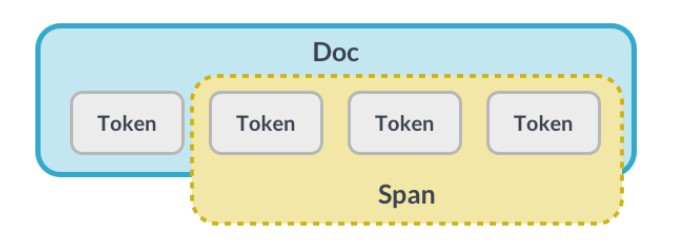

In [6]:
## Hình minh họa Image(fig1, height, width)

For example, `1 colon 3 [1 : 3]` will create a slice starting from the token at position `1`, **up to – but not including**! – the token at position `3`.

In [7]:
# A slice from a Doc is a SPAN object
span = doc[1: 3]

# Get span text via the text.attribute
span.text

'world!'

####  Lexical attributes
Here you can see some of the available token attributes: `"i"` is the index of the token within the parent document. `"text"` returns the token text. "`is alpha"`, `"is punct"` and `"like num"` return `boolean values` indicating whether the token consists of `alphanumeric characters`, whether it's punctuation or whether it resembles a number. 

For example, a token `"10"` – one, zero – or the word `"ten"` – `T, E, N`. 

These `attributes` are also called `lexical attributes`: they **refer to the entry in the vocabulary and don't depend on the token's context**.

In [8]:
doc = nlp("It costs $5.")

print("Index: \t\t", [token.i for token in doc])
print("Text: \t\t", [token.text for token in doc])
print("is_alpha: \t", [token.is_alpha for token in doc])
print("is_punct: \t", [token.is_punct for token in doc])
print("like_num: \t", [token.like_num for token in doc])

Index: 		 [0, 1, 2, 3, 4]
Text: 		 ['It', 'costs', '$', '5', '.']
is_alpha: 	 [True, True, False, False, False]
is_punct: 	 [False, False, False, False, True]
like_num: 	 [False, False, False, True, False]


### 1.2. PRACTICE
#### Exercise 1.2.1. Getting Started
Let's get started and try out spaCy! In this exercise, you'll be able to try out some of the 45+ available languages.
#### Step 1.
>- Import the `English` class from `spacy.lang.en` and create the `nlp` object.
>- Create a `doc` and print its `text`.

In [9]:
# Import the English language class
from spacy.lang.en import English

# Create the nlp object
nlp = English()

# Process a text
doc = nlp("This is a sentence.")

# Print the document text
print(doc.text)

This is a sentence.


**Step 2,**
>- Import the `German` class from `spacy.lang.de` and create the `nlp` object.
>- Create a `doc` and print its `text`.

In [10]:
# Import the German language class
from spacy.lang.de import German

# Create the nlp object
nlp = German()

# Process a text (this is German for: "Kind regards!")
doc = nlp("Liebe Grüße!")

# Print the document text
print(doc.text)

Liebe Grüße!


**Step 3.**
>- Import the `Spanish` class from `spacy.lang.es` and create the `nlp` object.
>- Create a `doc` and print its `text`.

In [11]:
# Import the Spanish language class
from spacy.lang.es import Spanish

# Create the nlp object
nlp = Spanish()

# Process a text (this is Spanish for: "How are you?")
doc = nlp("¿Cómo estás?")

# Print the document text
print(doc.text)

¿Cómo estás?


**Step 4**

In [12]:
# Import the France language class
from spacy.lang.fr import French

# Create the nlp object
nlp = French()

# Process a text (this is Spanish for: "How are you?")
doc = nlp("Bonjour")

# Print the document text
print(doc.text)

Bonjour


#### Exercise 1.2.2. Documents, spans and tokens
When you call nlp on a string, spaCy first tokenizes the text and creates a document object. In this exercise, you'll learn more about the Doc, as well as its views Token and Span.
#### SOLUTION
**Step 1.**
>- Import the `English` language class and create the `nlp` object.
>- Process the `text` and instantiate a `Doc` object in the variable `doc`.
>- Select the first `token` of the `Doc` and print its `text`.

In [13]:
# Import the English language class and create the nlp object
from spacy.lang.en import English
nlp = English()

# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

# Select the first token
first_token = doc[0]

# Print the first token's text
print(first_token.text)

I


**Step 2.** Create a slice of the `Doc` for the tokens `"tree kangaroos"` and `"tree kangaroos and narwhals"`.

In [14]:
# Import the English language class and create the nlp object
from spacy.lang.en import English
nlp = English()

# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

# A slice of the Doc for "tree kangaroos"
tree_kangaroos = doc[2:4]
print(tree_kangaroos.text)

# A slice of the Doc for "tree kangaroos and narwhals" (without the ".")
tree_kangaroos_and_narwhals = doc[2:-1]
print(tree_kangaroos_and_narwhals.text)

tree kangaroos
tree kangaroos and narwhals


#### Exercise 1.2.3. Lexical attributes
In this example, you'll use `spaCy's Doc` and `Token` objects, and lexical attributes to find percentages in a text. 

You'll be looking for two subsequent tokens: a number and a `percent` sign. The `English nlp object` has already been created.
#### SOLUTION.

In [15]:
# Process the text
doc = nlp("In 1990, more than 60% of people in East Asia were in extreme poverty. Now less than 4% are.")

# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if token.like_num == 1:
        # Get the next token in the document
        next_token = doc[token.i + 1]
        # Check if the next token's text equals '%'
        if next_token.text == '%':
            print('Percentage found:', token.text)

Percentage found: 60
Percentage found: 4


## 2. Statistical models
### 2.1. Theory
#### What are statistical models?
Some of the most interesting things you can analyze are context-specific: for example, whether a word is a verb or whether a span of text is a person name. Statistical models enable `spaCy` to make predictions in context. 

This usually includes part-of speech tags, syntactic dependencies and named entities. 

Models are trained on large datasets of labeled example texts. 

They can be updated with more examples to fine-tune their predictions – for example, to perform better on your specific data.

#### Model Packages
spaCy provides a number of pre-trained model packages you can download.

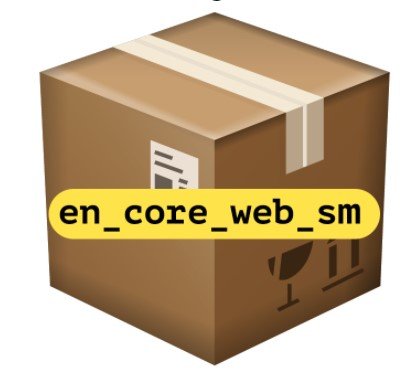

In [16]:
## Hình minh họa Image(fig1, height, width)

For example, the "en_core_web_sm" package is a small English model that supports all core capabilities and is trained on web text.

In [17]:
import spacy
nlp = spacy.load("en_core_web_sm")
nlp

The `spacy.load` method loads a `model package by name` and returns an `nlp` object. 

- The package **provides the `binary weights` that enable `spaCy` to make predictions**. 
- It also **includes the vocabulary**, and **meta information** to tell spaCy which language class to use and how to configure the processing `pipeline`.

#### Predicting Part-of-speech Tags
Let's take a look at the model's predictions. 

In this example, we're using spaCy to predict part-of-speech tags, the word types in context. 
- First, we load the small English model and receive an nlp object. 

In [18]:
# Load small English model
nlp = spacy.load("en_core_web_sm")

- Next, we're processing the text `"She ate the pizza"`. 

In [19]:
doc = nlp("She ate the pizza")

For each `token` in the `Doc`, we can print the text and the `"pos underscore"` attribute, the predicted part-of-speech `tag`. 

In [20]:
for token in doc:
    print(token.text, '\t', token.pos_)

She 	 PRON
ate 	 VERB
the 	 DET
pizza 	 NOUN


In `spaCy`, attributes that return strings usually end with an `underscore_` – attributes without the underscore return an `ID`. 

Here, the model correctly predicted `"ate"` as a `verb` and `"pizza"` as a `noun`.

#### Predicting Syntactic Dependencies
In addition to the part-of-speech tags, we can also predict how the words are related. 

For example, whether a `word` is the `subject` of the sentence **or** an `object`. 

In [21]:
for token in doc:
    print(token.text, '\t', token.pos_, '\t', token.dep_, '\t', token.head.text)

She 	 PRON 	 nsubj 	 ate
ate 	 VERB 	 ROOT 	 ate
the 	 DET 	 det 	 pizza
pizza 	 NOUN 	 dobj 	 ate


The `"dep underscore": dep_` attribute returns the predicted dependency label. 

The `head` attribute returns the syntactic head token. You can also think of it as the parent token this word is attached to.

#### Dependency label scheme
To describe syntactic dependencies, spaCy uses a standardized label scheme. 

Here's an example of some common labels: The pronoun `"She"` is a nominal subject attached to the verb – in this case, to `"ate"`. 

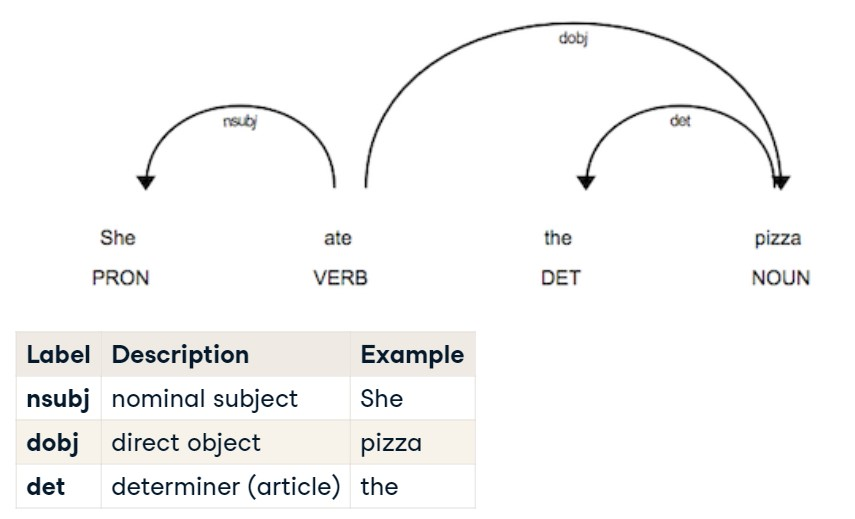

In [22]:
## Hình minh họa Image(fig1, height, width)

The noun `"pizza"` is a direct object attached to the verb `"ate"`. It is eaten by the subject, `"she"`. 

The determiner `"the"`, also known as an article, is attached to the noun `"pizza"`.

#### Predicting Named Entities
Named entities are **"real world objects"** that are assigned a name – for example, a person, an organization or a country. 

- The `doc.ents` property lets you access the named entities predicted by the model. 
- It returns an iterator of `Span objects`, so we can print the entity text and the entity label using the `"label underscore": label_` attribute. 

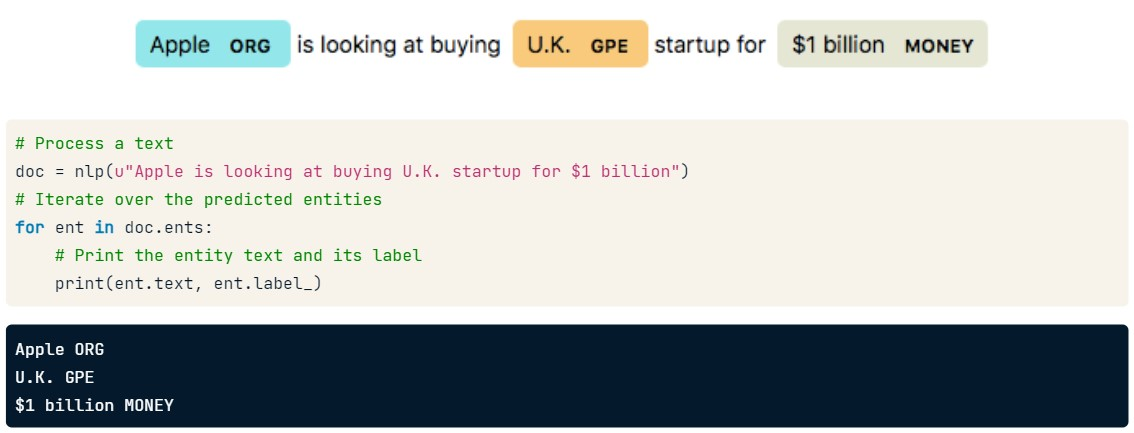

In [23]:
## Hình minh họa Image(fig1, height, width)

In this case, the model is correctly predicting
- `"Apple"` as an `organization`, 
- `"U.K."` as a geopolitical` entity` and 
- `"$1 billion"` as `money`.

#### Tip: the explain method
A quick tip: To get definitions for the most common tags and labels, you can use the spacy dot explain helper function. 

In [24]:
spacy.explain("GPE")

'Countries, cities, states'

For example, `"GPE"` for geopolitical entity isn't exactly intuitive – but spacy dot explain can tell you that it refers to countries, cities and states. 

The same works for part-of-speech tags and dependency labels.

In [25]:
spacy.explain("NNP")

'noun, proper singular'

### 2.2. PRACTICES
#### Exercise 2.2.1. Model packages
What's **not included** in a `model package` that you can load into `spaCy`?

>- A. A meta file including the `language`, `pipeline` and `license`.
>- B. `Binary weights` to make `statistical predictions`.
>- C. The `labelled data` that the model was trained on.
>- D. `Strings` of the `model's vocabulary` and their `hashes`.

#### Answers & explaination.
>- A. Incorrect! All models include a `meta.json` that defines the language to initialize, the pipeline component names to load as well as general `meta information` like the model `name`, `version`, `license`, `data sources`, `author` and `accuracy figures` (if available).
>- B. Incorrect! To predict `linguistic annotations` like part-of-speech `tags`, `dependency labels` or `named entities`, models include `binary weights`.
>- **C. Correct!!** `Statistical models` allow you to generalize based on a set of training examples. Once they're trained, they use binary weights to make predictions. That's why it's not necessary to ship them with their training data.
>- D. Incorrect! `Model packages` include a `strings.json` that stores the entries in the model's vocabulary and the mapping to `hashes`. This allows `spaCy` to only communicate in hashes and look up the corresponding string if needed.

#### Exercise 2.2.2. Loading models
Let's start by loading a model. spacy is already imported.
#### Step 1.
>- Use `spacy.load` to load the small `English` model `'en_core_web_sm'`.
>- Process the `text` and print the document `text`.

In [26]:
# Load the 'en_core_web_sm' model – spaCy is already imported
nlp = spacy.load('en_core_web_sm')

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

# Print the document text
print(doc.text)

It’s official: Apple is the first U.S. public company to reach a $1 trillion market value


**Step 2.**
>- Use `spacy.load` to load the small `German` model `'de_core_news_sm'`.
>- Process the text and print the document `text`.

In [27]:
# Load the 'de_core_news_sm' model – spaCy is already imported
#nlp = spacy.load('de_core_news_sm')

text = "Als erstes Unternehmen der Börsengeschichte hat Apple einen Marktwert von einer Billion US-Dollar erreicht"

# Process the text
doc = nlp(text)

# Print the document text
print(doc.text)

Als erstes Unternehmen der Börsengeschichte hat Apple einen Marktwert von einer Billion US-Dollar erreicht


#### Exercise 2.2.3. Predicting linguistic annotations
You'll now get to try one of spaCy's pre-trained model packages and see its predictions in action. Feel free to try it out on your own text! The small English model is already available as the variable nlp.

To find out what a tag or label means, you can call spacy.explain in the `IPython` shell. For example: `spacy.explain('PROPN')` or `spacy.explain('GPE')`.
#### SOLUTION
**Step 1.**
>- Process the `text` with the `nlp` object and create a `doc`.
>- For each `token`, print the token `text`, the token's `.pos_` (part-of-speech tag) and the token's `.dep_` (dependency label).

In [28]:
text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print('{:<12}{:<10}{:<10}'.format(token_text, token_pos, token_dep))

It          PRON      nsubj     
’s          VERB      ccomp     
official    ADJ       dobj      
:           PUNCT     punct     
Apple       PROPN     nsubj     
is          AUX       ROOT      
the         DET       det       
first       ADJ       amod      
U.S.        PROPN     nmod      
public      ADJ       amod      
company     NOUN      attr      
to          PART      aux       
reach       VERB      relcl     
a           DET       det       
$           SYM       quantmod  
1           NUM       compound  
trillion    NUM       nummod    
market      NOUN      compound  
value       NOUN      dobj      


#### Step 2.
>- Process the `text` and create a `doc` object.
>- Iterate over the doc.ents and print the `entity text` and `label_` attribute.

In [29]:
text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

# Iterate over the predicted entities
for ent in doc.ents:
    # print the entity text and its label
    print('{:<19}{:<11}'.format(ent.text, ent.label_))

Apple              ORG        
first              ORDINAL    
U.S.               GPE        
$1 trillion        MONEY      


#### Exercise 2.2.4. Predicting named entities in context
Models are statistical and not always right. 

Whether their predictions are correct depends on the training data and the text you're processing. 

Let's take a look at an example. The small English model is available as the variable `nlp`.
#### Step 1.
>- Process the text with the nlp object.
>- Iterate over the entities with the iterator ent and print the entity text and label.

In [30]:
text = "New iPhone X release date leaked as Apple reveals pre-orders by mistake"

# Process the text
doc = nlp(text)

# Iterate over the entities
for ent in doc.ents:
    # print the entity text and label
    print('{:<19}{:<11}'.format(ent.text, ent.label_))

Apple              ORG        


**Step 2.** Looks like the model didn't predict `"iPhone X"`. Create a `span` for those tokens manually.

In [31]:
# Get the span for "iPhone X"
iphone_x = doc[1:3]

# Print the span text
print('Missing entity:', iphone_x.text)

Missing entity: iPhone X


## 3. Rule-based matching
### 3.1. Theory
#### Why not just regular expressions?
Compared to regular expressions, the matcher works with `Doc` and `Token` objects instead of only strings. 

It's also more flexible: you can search for texts but also other `lexical attributes`. You can even write rules that use the model's predictions. 

For example, find the word `"duck"` only if it's **a `verb`, not a `noun`**.
#### Match patterns
Match patterns are lists of dictionaries. Each dictionary describes one token. The keys are the names of token attributes, mapped to their expected values. 
- In this example, we're looking for two tokens with the text `"iPhone"` and `"X"`.

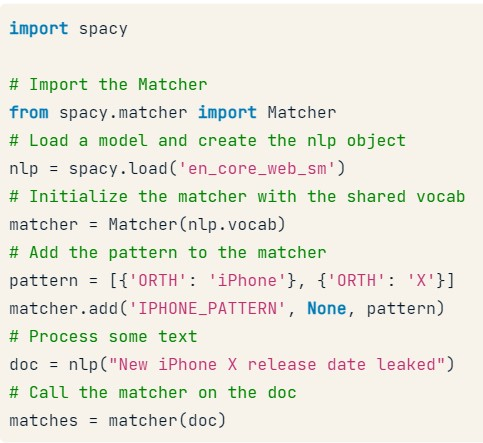

In [32]:
## Hình minh họa Image(fig1, height, width)

We can also match on other token attributes. 

Here, we're looking for two tokens whose lowercase forms equal `"iphone"` and `"x"`. We can even write patterns using attributes predicted by the model. 

Here, we're matching a token with the lemma `"buy"`, plus a `noun`. The lemma is the base form, so this pattern would match phrases like `"buying milk"` or `"bought flowers"`.

#### Using `matcher()`
To use a `pattern`, we first import the `matche`r from `spacy.matcher`. 

We also load a model and create the `nlp` object. The `matcher` is initialized with the shared vocabulary, `nlp.vocab`.

You'll learn more about this later – for now, just remember to always pass it in. The `matcher.add` method lets you add a pattern. 
- The first argument is a `unique ID` to identify which pattern was matched. 
- The second argument is an `optional callback`. We don't need one here, so we set it to None. 
- The third argument is the `pattern`. 

To match the pattern on a text, we can call the matcher on any doc. This will return the matches.

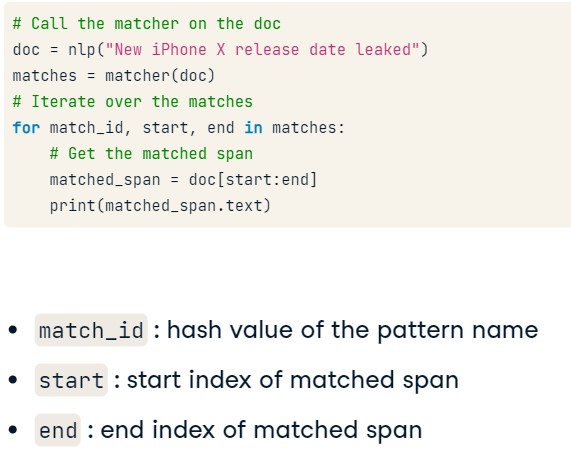

In [33]:
## Hình minh họa Image(fig1, height, width)

When you call the matcher on a doc, it returns a list of tuples. 

Each `tuple` consists of three values: `the match ID`, the `start index` and the `end index` of the matched `span`. 

This means we can iterate over the matches and create a Span object: a slice of the doc at the start and end index.

#### Matching lexical attributes
Here's an example of a more complex pattern using lexical attributes. 

We're looking for five tokens: A token consisting of only digits. Three case-insensitive tokens for `"fifa"`, `"world"` and `"cup"`. 

And a token that consists of punctuation. The pattern matches the tokens `"2018 FIFA World Cup:"`.

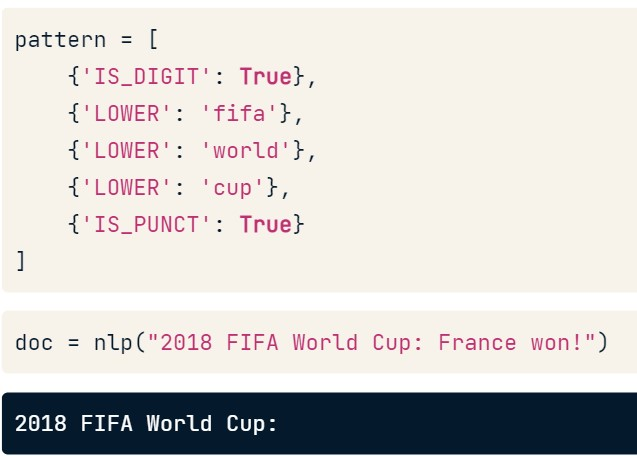

In [34]:
## Hình minh họa Image(fig1, height, width)

#### Matching other token attributes
In this example, we're looking for two tokens: A verb with the lemma `"love"`, followed by a noun. 

This pattern will match `"loved dogs"` and `"love cats"`.

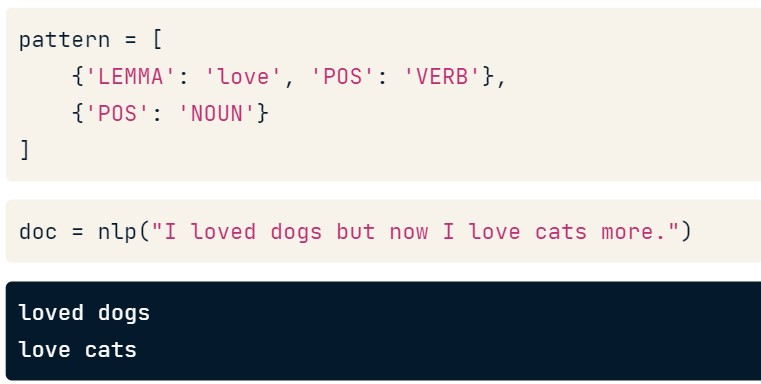

In [35]:
## Hình minh họa Image(fig1, height, width)

#### Using operators and quantifiers
Operators and quantifiers let you define how often a token should be matched. 

They can be added using the `"OP" key`. Here, the `"?"` operator makes the determiner token optional, so it will match a token with the lemma `"buy"`, an optional article and a `noun`.

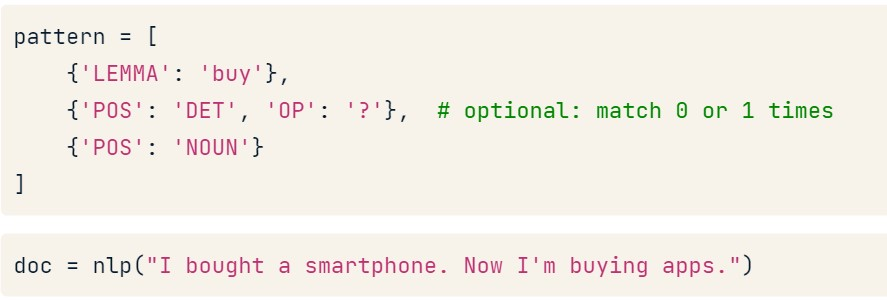

In [36]:
## Hình minh họa Image(fig1, height, width)

`"OP"` can have one of four values: 

- An `"!"` negates the `token`, so it's matched 0 times. 
- A `"?"` makes the `token optional`, and matches it `0` or `1` times. 
- A `"+"` matches a token 1 or more times. 
- And finally, an `"*"` matches `0` or more times. 

Operators can make your patterns a lot more powerful, but they also add more complexity – so use them wisely.

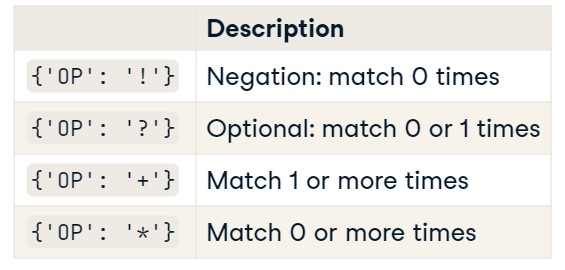

In [37]:
## Hình minh họa Image(fig1, height, width)

### 3.2. PRACTICES
#### Exercise 3.2.1. Using the Matcher
Let's try spaCy's rule-based Matcher. You'll be using the example from the previous exercise and write a pattern that can match the phrase `"iPhone X"` in the text. The nlp object and a processed doc are already available.
#### Step 1.
>- Import the `Matche`r from `spacy.matcher`.
>- Initialize it with the `nlp` object's shared `vocab`.

In [38]:
# Import the Matcher
from spacy.matcher import Matcher

# Initialize the Matcher with the shared vocabulary
matcher = Matcher(nlp.vocab)

**Step 2.**
>- Create a pattern that matches the `'TEXT'` values of two tokens: `"iPhone"` and `"X"`.
>- Use the `matcher.add` method to add the pattern to the matcher.

In [39]:
# Create a pattern matching two tokens: "iPhone" and "X"
pattern = [{'TEXT': 'iPhone'}, {'TEXT': 'X'}]

# Add the pattern to the matcher
matcher.add('IPHONE_X_PATTERN', None, pattern)

**Step 3.**
>- Call the matcher on the doc and store the result in the variable `matches`.
>- Iterate over the matches and get the matched span from the `start` to the `end` index.

In [40]:
# Use the matcher on the doc
matches = matcher(doc)
print('Matches:', [doc[start:end].text for match_id, start, end in matches])

Matches: ['iPhone X']


**Comments.** Now, we successfully found one match: the tokens at `doc[1:3]` describing the span for `"iPhone X"`.

#### Exercise 3.2.3. Writing match patterns
In this exercise, you'll practice writing more complex match patterns using different token attributes and operators. A matcher is already initialized and available as the variable matcher.
- **Step 1.** Write one pattern that only matches mentions of the full iOS versions: `"iOS 7"`, `"iOS 11"` and `"iOS 10"`.

In [41]:
doc = nlp("After making the iOS update you won't notice a radical system-wide redesign: nothing like the aesthetic upheaval we got with iOS 7. Most of iOS 11's furniture remains the same as in iOS 10. But you will discover some tweaks once you delve a little deeper.")

# Write a pattern for full iOS versions ("iOS 7", "iOS 11", "iOS 10")
pattern = [{'TEXT': "iOS"}, {'IS_DIGIT': True}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add('IOS_VERSION_PATTERN', None, pattern)
matches = matcher(doc)
print('Total matches found:', len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print('Match found:', doc[start:end].text)

Total matches found: 3
Match found: iOS 7
Match found: iOS 11
Match found: iOS 10


**Step 2.** Write one pattern that only matches forms of `"download"` (tokens with the lemma `"download"`), followed by a token with the part-of-speech `tag 'PROPN'` (proper noun).

In [42]:
doc = nlp("i downloaded Fortnite on my laptop and can't open the game at all. Help? so when I was downloading Minecraft, I got the Windows version where it is the '.zip' folder and I used the default program to unpack it... do I also need to download Winzip?")

# Write a pattern that matches a form of "download" plus proper noun
pattern = [{'LEMMA': "download"}, {'POS': "PROPN"}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add('DOWNLOAD_THINGS_PATTERN', None, pattern)
matches = matcher(doc)
print('Total matches found:', len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print('Match found:', doc[start:end].text)

Total matches found: 2
Match found: downloaded Fortnite
Match found: downloading Minecraft


**Step 3.** Write one pattern that matches adjectives `('ADJ')` followed by one or two `'NOUN's` (one noun and one optional noun).

In [43]:
doc = nlp("Features of the app include a beautiful design, smart search, automatic labels and optional voice responses.")

# Write a pattern for adjective plus one or two nouns
pattern = [{'POS': 'ADJ'}, {'POS': 'NOUN'}, {'POS': 'NOUN', 'OP': '?'}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add('ADJ_NOUN_PATTERN', None, pattern)
matches = matcher(doc)
print('Total matches found:', len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print('Match found:', doc[start:end].text)

Total matches found: 5
Match found: beautiful design
Match found: smart search
Match found: automatic labels
Match found: optional voice
Match found: optional voice responses
